## Домашнее задание 1

**Дедлайн: 7 февраля 23:59**

После дедлайна задание **не принимается**. Но если вы понимаете заранее, что обстоятельства непреодолимой силы не позволят вам сдать работу вовремя, напишите нам об этом, и мы договоримся об индивидуальном переносе дедлайна. Домашние задания не пересдаются.

Работы присылайте на daria.ryzhova@mail.ru и daschapopowa@gmail.com (на оба адреса).

В этом задании мы будем создавать аналог системы CLICS на основе небольшого фрагмента онтологии WordNet, т.е. возьмем из WordNet данные о колексификациях значений (в этом случае - синсетов) и построим по ним взвешенный граф. 

 - [x] **Шаг 1 (0.3 балла)**

В базе WordNet возьмите синсет 'search.v.01'. Из всех языков, которые есть в базе, извлеките списки лемм, относящихся к этому синсету.

**NB!** Если вы возьмете в качестве стартового не этот синсет, а любой другой, это принесет вам 1 бонусный балл. Но будьте внимательны: в этом случае вам нужно будет самостоятельно регулировать ограничения на количество колексификаций из шага 2 так, чтобы в итоговом графе было не меньше 30 и не больше 60 узлов. 

 - [x] **Шаг 2 (0.7 балла)**

Теперь, наоборот, для каждой леммы из каждого языка составьте список синсетов, к которым она относится. Из этих синсетов выберите такие, к которым относится больше 3 лемм из нашего изначального списка (надеемся, что это поможет нам выделить более устойчивые и надежные связи). Оставшиеся синсеты и станут узлами нашего графа.

 - [x] **Шаг 3 (1 балл)**

Теперь строим ребра. Ребро между двумя синсетами ставьте в том случае, если хотя бы в одном языке есть хотя бы одна лемма, которая относится к ним обоим. Пусть граф будет взвешенным: вес ребра будет отражать количество лемм, относящихся к обоим узлам пары.

**NB!** На этом шаге мы уже забываем про исходный список лемм из шага 1 (он нам нужен был только для отбора синсетов) и учитываем все леммы, относящиеся к отобранным узлам.

**Критерии**: 0.5 балла - ребра, 0.5 балла - вес ребер

 - [x] **Шаг 4 (3 балла)**

Проанализируйте получившийся граф. Сколько получилось связных компонент? Какая у этого графа плотность? Как распределились (взвешенные) степени узлов? Какие узлы оказались центральными (попробуйте несколько метрик, например, degree centrality и eigencentrality, прокомментируйте результат)? Разбейте граф на сообщества (поиграйте с несколькими алгоритмами) и прокомментируйте результаты.

**Критерии**: 0.5 - связные компоненты, 0.5 - плотность графа, 1 - степени и центральность узлов, 1 - сообщества

 - [x] **Шаг 5 (2 балла)**
 
Постройте точно такой же граф, только теперь ставьте ребра только в том случае, если пару синсетов объединяет не менее 5 лемм (убираем все ребра с небольшим весом в посиках наиболее устойчивых связей). Проанализируйте этот граф по той же схеме (см. шаг 4). Что изменилось? Какой из графов кажется вам более содержательным и почему?

**Критерии**: 0.5 - обновленный граф, 0.5 - подсчет всех метрик заново, 1 - комментарий

 - [x] **Шаг 6 (1 балл)**
 
Подведите небольшой теоретический итог. Какие выводы о колексификациях в зоне глаголов поиска позволяют сделать эти два графа?

 - [x] **Шаг 7 (бонусный, 1 балл)**
 
Сравните ваши графы с подграфом LOOK FOR из базы CLICS. Что общего, в чем отличия? С чем эти отличия могут быть связаны?


In [25]:
!pip install iso639-lang

In [173]:
import nltk
import operator
import networkx as nx

from iso639 import Lang
from operator import itemgetter
from collections import Counter
from networkx.algorithms import community

In [1]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katia\AppData\Roaming\nltk_data...


True

In [17]:
nltk.download('omw')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\katia\AppData\Roaming\nltk_data...


True

### Step 1

**NB!** Я взяла первый синсет глагол *like*. Как можно увидеть на шаге 2, кол-во узлов будет равно 38!

In [247]:
from nltk.corpus import wordnet as wn

In [285]:
like_exemplar = wn.synset('like.v.01')

In [286]:
like_dictionary = dict()
for language in wn.langs():
    if like_exemplar.lemma_names(language):
        like_dictionary[language] = like_exemplar.lemma_names(language)
        if language == 'qcn':
            print(f'Lemmas for Chinese language: {", ".join(like_exemplar.lemma_names(language))}')
        else:
            print(f'Lemmas for {Lang(language).name} language: {", ".join(like_exemplar.lemma_names(language))}')
    else:
        if language == 'qcn':
            print(f'No lemmas for Chinese language')
        else:
            print(f'No lemmas for {Lang(language).name} language')

Lemmas for English language: wish, care, like
Lemmas for Tosk Albanian language: dëshiroj, dua, pëlqej
Lemmas for Standard Arabic language: ابتغى, أراد, اشتهى, اعتنى, تاق, تشابه, تماثل, تمنى, حب, رام, رغب, فرض_عليه, مال, مال_إلي, ود
No lemmas for Bulgarian language
No lemmas for Catalan language
No lemmas for Mandarin Chinese language
No lemmas for Danish language
Lemmas for Modern Greek (1453-) language: θέλω
No lemmas for Basque language
No lemmas for Persian language
Lemmas for Finnish language: haluta, tahtoa
Lemmas for French language: aimer, souhaiter, vouloir
No lemmas for Galician language
No lemmas for Hebrew language
Lemmas for Croatian language: htjeti, voljeti, željeti
Lemmas for Indonesian language: bagai, bagaikan, berhasrat, berkehendak, demen, ganal, harap, hendak, ingin, kasdu, kayak, laksana, mau, mengasyiki, menghendaki, menginginkan, menyenangi, menyukai, peduli, sebagai, seperti, solak, suka
Lemmas for Italian language: piacere, prediligere, preferire
Lemmas for Ja

### Step 2

In [287]:
synsets_dictionary = dict()
synsets_list = []
for language in like_dictionary:
    for word in like_dictionary[language]:
        for lemma in wn.lemmas(word, lang=language):
            synsets_dictionary.setdefault(lemma.synset().name(), 0)
            synsets_dictionary[lemma.synset().name()] += 1
for syns in synsets_dictionary:
    if synsets_dictionary[syns] > 3:
        synsets_list.append(syns)

In [288]:
print('Кол-во узлов:', len(synsets_list))

Кол-во узлов: 38


### Step 3

In [289]:
like_G = nx.Graph()

In [290]:
like_G.add_nodes_from(synsets_list)

In [291]:
dictionary_of_synsets = dict()
for syns in synsets_list:
    dictionary_of_synsets[syns] = []
    syns = wn.synset(syns)
    for language in wn.langs():
        dictionary_of_synsets[syns.name()].extend(syns.lemma_names(language))

In [292]:
for syns_1 in dictionary_of_synsets:
    for syns_2 in dictionary_of_synsets:
        if syns_1 != syns_2:
            if set(dictionary_of_synsets[syns_1]) & set(dictionary_of_synsets[syns_2]):
                like_G.add_edge(syns_1, syns_2, weight=len(set(dictionary_of_synsets[syns_1]) & set(dictionary_of_synsets[syns_2])))

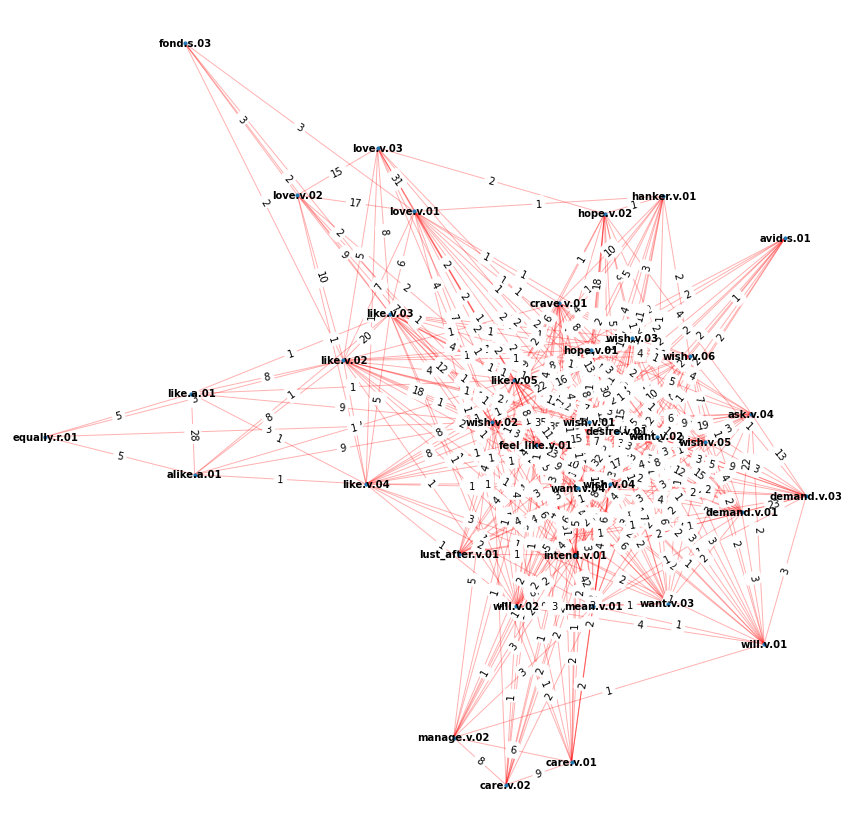

In [293]:
import matplotlib.pyplot as plt 

end_synsets = nx.spring_layout(like_G)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(like_G, end_synsets, node_size=10) 
labels = nx.get_edge_attributes(like_G, 'weight')
nx.draw_networkx_edge_labels(like_G, end_synsets, edge_labels=labels)
nx.draw_networkx_edges(like_G, end_synsets, alpha=0.3, edge_color='red')
nx.draw_networkx_labels(like_G, end_synsets, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

### Step 4

In [294]:
components = nx.components.connected_components(like_G)

nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
print(f'Всего {len(nodes)} связных компонент')

Всего 38 связных компонент


In [295]:
print(f'Всего рёбер {len(like_G.edges())} из {len(like_G.nodes()) * (len(like_G.nodes()) - 1)} возможных!')

Всего рёбер 387 из 1406 возможных!


In [296]:
print(f'Плотность графа равна ~{round(nx.density(like_G), 3)}')

Плотность графа равна ~0.55


In [297]:
weighted_degree = like_G.degree
weighted_degree = sorted(weighted_degree, key=itemgetter(1), reverse=True)
for node in weighted_degree:
    print(f'Взвешенная степень для узла {node[0]} равна {node[1]}')

Взвешенная степень для узла wish.v.02 равна 37
Взвешенная степень для узла want.v.04 равна 32
Взвешенная степень для узла desire.v.01 равна 32
Взвешенная степень для узла wish.v.01 равна 31
Взвешенная степень для узла wish.v.04 равна 31
Взвешенная степень для узла like.v.05 равна 30
Взвешенная степень для узла feel_like.v.01 равна 30
Взвешенная степень для узла intend.v.01 равна 30
Взвешенная степень для узла want.v.02 равна 29
Взвешенная степень для узла hope.v.01 равна 28
Взвешенная степень для узла mean.v.01 равна 26
Взвешенная степень для узла wish.v.03 равна 25
Взвешенная степень для узла like.v.02 равна 25
Взвешенная степень для узла like.v.03 равна 25
Взвешенная степень для узла crave.v.01 равна 25
Взвешенная степень для узла wish.v.06 равна 24
Взвешенная степень для узла will.v.02 равна 23
Взвешенная степень для узла wish.v.05 равна 21
Взвешенная степень для узла like.v.04 равна 20
Взвешенная степень для узла demand.v.01 равна 20
Взвешенная степень для узла want.v.03 равна 20
В

In [298]:
print(f'Центральные узлы по метрике eigencentrality: {", ".join(list(dict(sorted(nx.eigenvector_centrality(like_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')
print(f'Центральные узлы по метрике degree centrality: {", ".join(list(dict(sorted(nx.degree_centrality(like_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')
print(f'Центральные узлы по метрике closeness centrality: {", ".join(list(dict(sorted(nx.closeness_centrality(like_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')
print(f'Центральные узлы по метрике betweenness centrality: {", ".join(list(dict(sorted(nx.betweenness_centrality(like_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')

Центральные узлы по метрике eigencentrality: wish.v.02, want.v.04, desire.v.01, wish.v.01, wish.v.04
Центральные узлы по метрике degree centrality: wish.v.02, want.v.04, desire.v.01, wish.v.01, wish.v.04
Центральные узлы по метрике closeness centrality: wish.v.02, want.v.04, desire.v.01, wish.v.01, wish.v.04
Центральные узлы по метрике betweenness centrality: wish.v.02, like.v.05, like.v.02, like.v.03, feel_like.v.01


Для метрик *eigencentrality*, *closeness centrality* и *degree centrality* топ-5 совпадает. Однако для *betweenness centrality* список немного другой.

Притом топ-1 центральный узел для всех метрик совпадает: `wish.v.02` (у него и разрыв в 5 связей в сравнении взвешенных степеней), но, если *betweenness centrality* считает центральными варианты синсетов глагола *like* и связанного *feel like*, то остальные больше смотрят на остальные варианты *wish*, *want* и *desire*, что совпадает с узлами с самой высокой взвешенной степенью. Если думать про то, что *betweenness centrality* оценивает центральность по посредничеству, а нашим изначальным синсетом был первый вариант *like*, то логично встретить в связующих его другие варианты.

In [336]:
communities_generator = community.girvan_newman(like_G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)), '\n')
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['alike.a.01', 'ask.v.04', 'avid.s.01', 'care.v.01', 'care.v.02', 'crave.v.01', 'demand.v.01', 'demand.v.03', 'desire.v.01', 'feel_like.v.01', 'fond.s.03', 'hanker.v.01', 'hope.v.01', 'hope.v.02', 'intend.v.01', 'like.a.01', 'like.v.02', 'like.v.03', 'like.v.04', 'like.v.05', 'love.v.01', 'love.v.02', 'love.v.03', 'lust_after.v.01', 'manage.v.02', 'mean.v.01', 'want.v.02', 'want.v.03', 'want.v.04', 'will.v.01', 'will.v.02', 'wish.v.01', 'wish.v.02', 'wish.v.03', 'wish.v.04', 'wish.v.05', 'wish.v.06'], ['equally.r.01']] 

next level communities: [['alike.a.01', 'ask.v.04', 'avid.s.01', 'care.v.01', 'care.v.02', 'crave.v.01', 'demand.v.01', 'demand.v.03', 'desire.v.01', 'feel_like.v.01', 'fond.s.03', 'hanker.v.01', 'hope.v.01', 'hope.v.02', 'intend.v.01', 'like.v.02', 'like.v.03', 'like.v.04', 'like.v.05', 'love.v.01', 'love.v.02', 'love.v.03', 'lust_after.v.01', 'manage.v.02', 'mean.v.01', 'want.v.02', 'want.v.03', 'want.v.04', 'will.v.01', 'will.v.02', 'wish.v.0

In [300]:
communities_generator_2 = community.greedy_modularity_communities(like_G)
communities_generator_2

[frozenset({'alike.a.01',
            'ask.v.04',
            'avid.s.01',
            'care.v.01',
            'care.v.02',
            'crave.v.01',
            'demand.v.01',
            'demand.v.03',
            'desire.v.01',
            'equally.r.01',
            'feel_like.v.01',
            'fond.s.03',
            'hanker.v.01',
            'hope.v.01',
            'hope.v.02',
            'intend.v.01',
            'like.a.01',
            'like.v.02',
            'like.v.03',
            'like.v.04',
            'like.v.05',
            'love.v.01',
            'love.v.02',
            'love.v.03',
            'lust_after.v.01',
            'manage.v.02',
            'mean.v.01',
            'want.v.02',
            'want.v.03',
            'want.v.04',
            'will.v.01',
            'will.v.02',
            'wish.v.01',
            'wish.v.02',
            'wish.v.03',
            'wish.v.04',
            'wish.v.05',
            'wish.v.06'})]

In [335]:
communities_generator_3 = community.label_propagation_communities(like_G)
top_level_communities_3 = next(communities_generator_3)
print("Top level community:", ', '.join(sorted(top_level_communities_3)))

Top level community: alike.a.01, ask.v.04, avid.s.01, care.v.01, care.v.02, crave.v.01, demand.v.01, demand.v.03, desire.v.01, equally.r.01, feel_like.v.01, fond.s.03, hanker.v.01, hope.v.01, hope.v.02, intend.v.01, like.a.01, like.v.02, like.v.03, like.v.04, like.v.05, love.v.01, love.v.02, love.v.03, lust_after.v.01, manage.v.02, mean.v.01, want.v.02, want.v.03, want.v.04, will.v.01, will.v.02, wish.v.01, wish.v.02, wish.v.03, wish.v.04, wish.v.05, wish.v.06


Как видно по трем разным попыткам разбивки на сообщества, синсеты не объединяются в группы. Для *modularity-based communities* и *label propagation* группа одна, состоящая из всех элементов. Для *partitions via centrality measures* начинают выделяться  группы из одного элемента, которые находятся дальше от центра графа.

### Step 5

In [302]:
like_max_G = nx.Graph()

In [303]:
like_max_G.add_nodes_from(synsets_list)

In [304]:
for syns_1 in dictionary_of_synsets:
    for syns_2 in dictionary_of_synsets:
        if syns_1 != syns_2:
            if len(set(dictionary_of_synsets[syns_1]) & set(dictionary_of_synsets[syns_2])) > 4:
                like_max_G.add_edge(syns_1, syns_2, weight=len(set(dictionary_of_synsets[syns_1]) & set(dictionary_of_synsets[syns_2])))

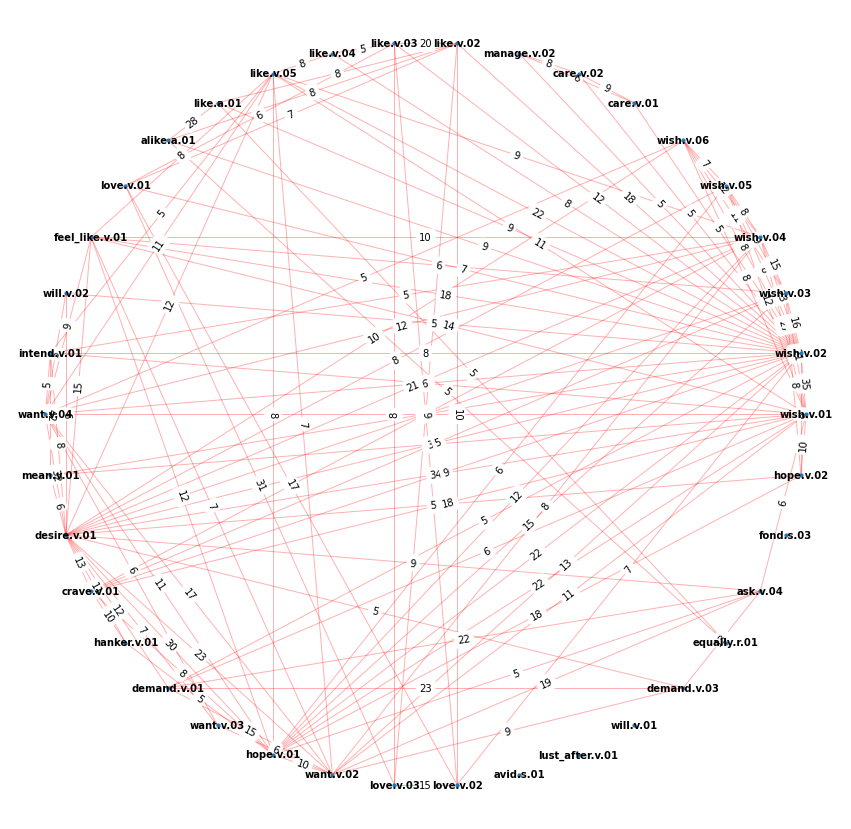

In [338]:
import matplotlib.pyplot as plt 

end_max_synsets = nx.shell_layout(like_max_G)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(like_max_G, end_max_synsets, node_size=10) 
labels = nx.get_edge_attributes(like_max_G, 'weight')
nx.draw_networkx_edge_labels(like_max_G, end_max_synsets, edge_labels=labels)
nx.draw_networkx_edges(like_max_G, end_max_synsets, alpha=0.3, edge_color='red')
nx.draw_networkx_labels(like_max_G, end_max_synsets, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

In [306]:
components_max = nx.components.connected_components(like_max_G)

nodes_max = sorted([(i, len(i)) for i in components_max], key=lambda x: x[1], reverse=True)[0][0]
print(f'Всего {len(nodes_max)} связных компонент')

Всего 34 связных компонент


In [307]:
print(f'Всего рёбер {len(like_max_G.edges())} из {len(like_max_G.nodes()) * (len(like_max_G.nodes()) - 1)} возможных!')

Всего рёбер 128 из 1406 возможных!


In [308]:
print(f'Плотность графа равна ~{round(nx.density(like_max_G), 3)}')

Плотность графа равна ~0.182


In [309]:
weighted_degree_max = like_max_G.degree
weighted_degree_max = sorted(weighted_degree_max, key=itemgetter(1), reverse=True)
for node in weighted_degree_max:
    print(f'Взвешенная степень для узла {node[0]} равна {node[1]}')

Взвешенная степень для узла wish.v.02 равна 27
Взвешенная степень для узла desire.v.01 равна 21
Взвешенная степень для узла wish.v.01 равна 17
Взвешенная степень для узла hope.v.01 равна 14
Взвешенная степень для узла wish.v.04 равна 13
Взвешенная степень для узла want.v.04 равна 12
Взвешенная степень для узла want.v.02 равна 12
Взвешенная степень для узла wish.v.03 равна 10
Взвешенная степень для узла like.v.05 равна 10
Взвешенная степень для узла feel_like.v.01 равна 9
Взвешенная степень для узла wish.v.05 равна 7
Взвешенная степень для узла wish.v.06 равна 7
Взвешенная степень для узла like.v.02 равна 7
Взвешенная степень для узла intend.v.01 равна 7
Взвешенная степень для узла crave.v.01 равна 7
Взвешенная степень для узла like.v.03 равна 6
Взвешенная степень для узла demand.v.01 равна 6
Взвешенная степень для узла ask.v.04 равна 6
Взвешенная степень для узла love.v.01 равна 5
Взвешенная степень для узла love.v.02 равна 5
Взвешенная степень для узла hope.v.02 равна 5
Взвешенная сте

In [310]:
print(f'Центральные узлы по метрике eigencentrality: {", ".join(list(dict(sorted(nx.eigenvector_centrality(like_max_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')
print(f'Центральные узлы по метрике degree centrality: {", ".join(list(dict(sorted(nx.degree_centrality(like_max_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')
print(f'Центральные узлы по метрике betweenness centrality: {", ".join(list(dict(sorted(nx.betweenness_centrality(like_max_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')
print(f'Центральные узлы по метрике closeness centrality: {", ".join(list(dict(sorted(nx.closeness_centrality(like_max_G).items(), key=itemgetter(1), reverse=True)).keys())[:5])}')

Центральные узлы по метрике eigencentrality: wish.v.02, desire.v.01, wish.v.01, wish.v.04, hope.v.01
Центральные узлы по метрике degree centrality: wish.v.02, desire.v.01, wish.v.01, hope.v.01, wish.v.04
Центральные узлы по метрике betweenness centrality: wish.v.02, desire.v.01, wish.v.01, want.v.02, hope.v.01
Центральные узлы по метрике closeness centrality: wish.v.02, desire.v.01, wish.v.01, hope.v.01, wish.v.04


Для всех метрик совпадает топ-3: `wish.v.02`, `desire.v.01` и `wish.v.01` (топ-3 по рейтингу взвешенных степеней). Также во всех списках метрик присутствует `hope.v.01` (четветрый в рейтинге). Однако для *degree centrality* и *closeness centrality* пятый элемент также совпадает с пятым в рейтинге взвешенных степеней (то есть топы совпадают). В *eigencentrality* `wish.v.04` и `hope.v.01` меняются местами по сравнению с топами двух предыдущих метрик. Для *betweenness centrality* же возникает `want.v.02` на четвертом месте, что, видимо, означает, что он связывает какие-то более разрозненные части графа.

In [334]:
communities_generator_max = community.girvan_newman(like_max_G)
top_level_communities_max = next(communities_generator_max)
next_level_communities_max = next(communities_generator_max)
next_next_level_communities_max = next(communities_generator_max)
print("top level communities:", sorted(map(sorted, top_level_communities_max)), '\n')
print("next level communities:", sorted(map(sorted, next_level_communities_max)), '\n')
print("next-next level communities:", sorted(map(sorted, next_next_level_communities_max)))

top level communities: [['alike.a.01', 'equally.r.01', 'like.a.01', 'like.v.02', 'like.v.03', 'love.v.01', 'love.v.02', 'love.v.03'], ['ask.v.04', 'care.v.01', 'care.v.02', 'crave.v.01', 'demand.v.01', 'demand.v.03', 'desire.v.01', 'feel_like.v.01', 'hanker.v.01', 'hope.v.01', 'hope.v.02', 'intend.v.01', 'like.v.04', 'like.v.05', 'manage.v.02', 'mean.v.01', 'want.v.02', 'want.v.03', 'want.v.04', 'will.v.02', 'wish.v.01', 'wish.v.02', 'wish.v.03', 'wish.v.04', 'wish.v.05', 'wish.v.06'], ['avid.s.01'], ['fond.s.03'], ['lust_after.v.01'], ['will.v.01']] 

next level communities: [['alike.a.01', 'equally.r.01', 'like.a.01', 'like.v.02', 'like.v.03', 'love.v.01', 'love.v.02', 'love.v.03'], ['ask.v.04', 'crave.v.01', 'demand.v.01', 'demand.v.03', 'desire.v.01', 'feel_like.v.01', 'hanker.v.01', 'hope.v.01', 'hope.v.02', 'intend.v.01', 'like.v.04', 'like.v.05', 'mean.v.01', 'want.v.02', 'want.v.03', 'want.v.04', 'will.v.02', 'wish.v.01', 'wish.v.02', 'wish.v.03', 'wish.v.04', 'wish.v.05', 'wis

In [314]:
communities_generator_max_2 = community.greedy_modularity_communities(like_max_G)
communities_generator_max_2

[frozenset({'alike.a.01',
            'ask.v.04',
            'care.v.01',
            'care.v.02',
            'crave.v.01',
            'demand.v.01',
            'demand.v.03',
            'desire.v.01',
            'equally.r.01',
            'feel_like.v.01',
            'hanker.v.01',
            'hope.v.01',
            'hope.v.02',
            'intend.v.01',
            'like.a.01',
            'like.v.02',
            'like.v.03',
            'like.v.04',
            'like.v.05',
            'love.v.01',
            'love.v.02',
            'love.v.03',
            'manage.v.02',
            'mean.v.01',
            'want.v.02',
            'want.v.03',
            'want.v.04',
            'will.v.02',
            'wish.v.01',
            'wish.v.02',
            'wish.v.03',
            'wish.v.04',
            'wish.v.05',
            'wish.v.06'}),
 frozenset({'avid.s.01'}),
 frozenset({'lust_after.v.01'}),
 frozenset({'will.v.01'}),
 frozenset({'fond.s.03'})]

In [329]:
communities_generator_max_3 = community.label_propagation_communities(like_max_G)
i = 0
for level_communities in communities_generator_max_3:
    i += 1
    print(f"Top-{i} level community:", ', '.join(sorted(level_communities)))

Top-1 level community: will.v.01
Top-2 level community: fond.s.03
Top-3 level community: ask.v.04, care.v.01, care.v.02, crave.v.01, demand.v.01, demand.v.03, desire.v.01, feel_like.v.01, hanker.v.01, hope.v.01, hope.v.02, intend.v.01, like.v.04, like.v.05, manage.v.02, mean.v.01, want.v.02, want.v.03, want.v.04, will.v.02, wish.v.01, wish.v.02, wish.v.03, wish.v.04, wish.v.05, wish.v.06
Top-4 level community: alike.a.01, equally.r.01, like.a.01
Top-5 level community: like.v.02, like.v.03, love.v.01, love.v.02, love.v.03
Top-6 level community: avid.s.01
Top-7 level community: lust_after.v.01


Как видно по трем разным попыткам разбивки на сообщества, *modularity-based communities* справляется хуже всего, так как он просто выделяет в отдельные группы синсеты, не связанные ребрами с другими, а остальные запихивает в один сет. 

*Label propagation* справляется получше, определяя в одну группу все варианты синсета глагола *love* и смежных с ним - *like*. Также в отдельную группу идут синсеты со значением похожести: `alike.a.01`, `equally.r.01` и `like.a.01`. Остальные либо пошли индивидуальные группы (когда нет ребр), либо были засунуты в одну супер-группу.  

Также не так плохо справился *partitions via centrality measures*: на первой итерации у него есть одна группа, аналогичная сумме первых двух групп по *label propagation*, индивидуальные и остальные. На второй: выделяет из остальных `care.v.01`, `care.v.02` и `manage.v.02`. Но на третьей уже снова начинает выкидывать из большого супер-сета по одному значению(

Кажется, что при условии, что деление на группы присходит успешенее и центральные узлы начинают меняться в зависимости от метрик, второй график имеет больше смысла, являясь просто более содержательным!

### Step 6

По-видимому, можно точно выделить три группы:
1. наречия со значением схожести (`alike.a.01`, `equally.r.01`, `like.a.01`)
2. глаголы со значением романтической привязанности (`like.v.02`, `like.v.03`, `love.v.01`, `love.v.02`, `love.v.03`)
3. глаголы со значением обращаться-ухаживать, где два одушевленных существа находятся в отношениях заботы *-er*/*-ee* (по аналогии с *employer*/*employee*) (`care.v.01`, `care.v.02`, `manage.v.02`)

Также есть несколько аутлайеров: `avid.s.01`, `will.v.01`, `fond.s.03`, `lust_after.v.01`, - недостаточно близко связанных с *like*. 

Остальные же глаголы выделяются в одну большую супер-группу со значением интенции, желания, надежды.

### Step 7

#### Subgraph LIKE from CLICS:

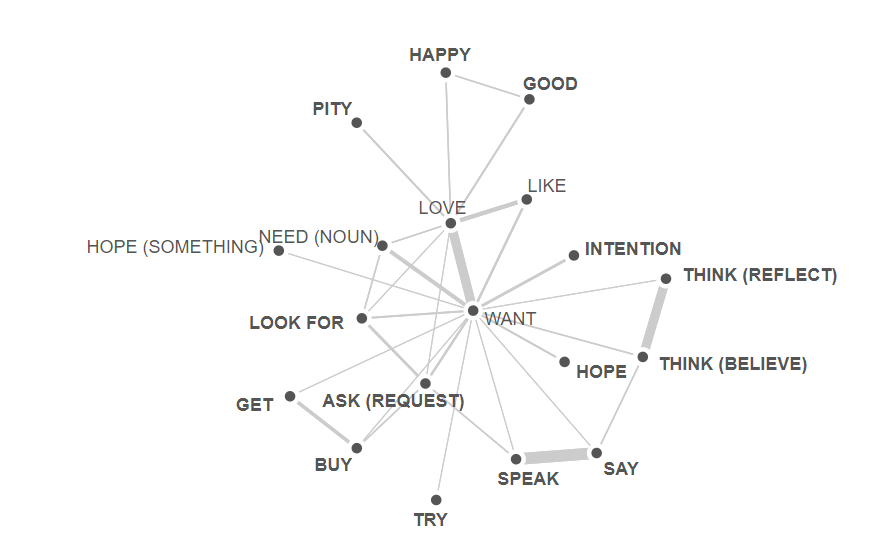

В нашем графе мы тоже можем выделить узлы:
1. WANT
2. LIKE
3. LOVE
4. HOPE

А также возможные: 
5. INTENTION (`intend.v.01`)
6. ASK (REQUEST) (`ask.v.04`)

Однако, так как у нас центральным значением было *like*, а не *want*, как в CLICS, остальные узлы никак себя не проявили. 

Полностью совпали на двух графиках только группы романтической привязанности (LOVE). Остальные узлы из CLICS WordNet "сгреб в одну кучу", которую можно назвать супер-группой. Это, скорее всего, опять же связано с тем, что у нас центральным значением является именно *like*, а не *want*. Интересно, что у нас возникла группа со значением обращаться-ухаживать, которой нет в CLICS. Отсутствие же в CLICS группы со значением схожести вполне объяснимо, так как это не глагольные синсеты, которые и не должны были так-то попасть в глагольный под-граф.
